In [1]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np
import os


def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def _savefig(fig,ax,name='',title='',fts=10,xsize=(10,10),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    fig.set_size_inches(xsize)
    fig.savefig(name + '.png')#,dpi='figure')
    fig.savefig(name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)

def _mkdir(path):
    print('path : ',path)
    print(os.path.exists(path))
    if not(os.path.exists(path)):
      os.mkdir(path)

Semestre = 6 #5 #1
Sem_ch   = str(Semestre)

#For S6 only
complementaire = False

pathini = '/Users/florentbrient/'
pathini = '/home/fbrient/'
path    = pathini+'Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S'+Sem_ch+'/'

fileadd = []
file    = 'Responses_S'+Sem_ch+'_2022_2023.xlsx' #'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+'.csv'


#if Semestre == 4:
#  file  = 'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+' - v2.csv'
#elif Semestre == 5: 
#  fileadd   = []
  #fileadd   = 'Sondage UE Sciences de la Terre - Ressources.csv'
  #fileadd   = 'Sondage UE Sciences de la Terre - Océanographie.csv'
#  fileadd   = 'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv'
   #[ 'Sondage UE Sciences de la Terre - Ressources.csv'
             #,'Sondage UE Sciences de la Terre - Océanographie.csv'
             #,'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv']
if Semestre == 6 and complementaire: 
    file   = 'Responses_S'+Sem_ch+'_2022_2023_complementaires.xlsx'

suffix = ''
#if len(fileadd)>0:
#    suffix = '_'+fileadd.split(' ')[-1].split('.')[0] 
#    file   = fileadd
#print(file,fileadd,suffix)

file   = path+file
print('file : ',file)

pathfig0 = path #'/Users/florentbrient/Dropbox/Enseignements/2020_2021/Responsable_Eval/Sondage/'
pathfig  = pathfig0+'d_figures/'
_mkdir(pathfig)

#df1    = pd.read_csv(file)
df1    = pd.read_excel(file)
#print(type(df1))
if len(fileadd)>0:
    for tmp in fileadd:
        print(tmp)
        df_tmp = pd.read_excel(path+tmp)
        #print(df_tmp)
        df1 = pd.concat([df1,df_tmp], axis=1) #, sort=False )#ignore_index=True) #, sort=False)
#df_eng = pd.read_excel('translate_FR.xlsx', header=1,encoding='latin1')
#df_eng = df_eng.set_axis(df_fr.columns.values.tolist(),axis='columns')
#df     = df_fr.append(df_eng, ignore_index=True, sort=False)

df     = df1
#print(df)

questions=df.columns.values
print(questions)



file :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/Responses_S6_2022_2023.xlsx
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/
True
['Horodateur' 'Quelle formation avez-vous suivi ?'
 "Avez-vous suivi l'UE Approche Intégrée en Géosciences (AIG) (LU3ST613) ?"
 'Que diriez-vous des objectifs de cette UE ? [Ils vous ont été présentés]'
 'Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]'
 "Contenu de l'UE [Les séances sont bien adapté à vos connaissances et compétences préalables]"
 "Contenu de l'UE [La charge de travail est adéquate par rapport au nombre de crédits ECTS]"
 "Contenu de l'UE [Les modalités d’évaluation sont adaptées avec les objectifs de l’UE]"
 "Contenu de l'UE [Les enseignements de cette UE vous ont intéressé.]"
 'Vous sentez-vous mieux préparé à l’analyse de documents variés?'
 'Le travail en sous-groupe vous a-t-il permis d’enrichir vos connaissances propres lors du travail sur document

In [2]:
# Formation

pies     = [1]
New_name = ['Formation?']

c1='#1f77b4' #blue
c2='red' #green
n=4
colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

#print(df[questions[pies[0]]])
formation = df[questions[pies[0]]]#.squeeze(axis=1)
if len(formation.shape)>1:
    print(formation.shape)
    print(formation.iloc[:,[0]])
    formation=formation.iloc[:,[0]].squeeze()
print(formation.shape)

print(type(formation))
labels0 = formation.unique()
print(labels0)
#['Majeure' 'Mineure Geosciences' 'Monodisciplinaire Sciences de la Terre'
# 'Bi-disciplinaire : Biologie - Mineure Sciences de la Terre (MEEF)']
    

colors  = ['royalblue','red','gold','green','purple','cyan']
colors_save = colors

figsize = (8, 5)

for ij,nbpie in enumerate(pies): 
    fig, ax = plt.subplots(1,figsize=figsize)

    #data = df[questions[nbpie]].value_counts()#normalize=True)
    data = formation.value_counts()#normalize=True)
    print(data)
    for ik in data.index:
       data = data.rename(index={ik:ik.split(' ')[0]})
    print(data)
    
    labels  = data.index #[ij.split(' ')[0] for ij in labels0 if ij in data.index]  
    print(labels,data.index)#,dcolors)
    
        
    gcolors = dict()
    keys    = labels
    for ik,key in enumerate(keys):
        print(ik, key)
        gcolors[key]=colors[ik]
    print(gcolors)
    labels = [ik for ik in gcolors if ik in data.index]
    data   = data.reindex(labels)
    print(labels)
    
    wedges, texts, autotexts = ax.pie(data,labels=labels
                                  ,autopct=lambda pct: func(pct, data)
                                  ,colors=[gcolors[i] for i in data.index]
                                  ,textprops=dict(color="k"),startangle=90
                                  ,pctdistance=0.7, labeldistance=1.2
                                 )
    print(ax.xaxis.get_label())
    ax.legend(wedges, labels,
          loc="upper right",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")

    title = New_name[ij]
    ax.set_title(title)
    
    name_file = pathfig+title.split('?')[0]+'_Semestre'+Sem_ch+suffix
    print(title,name_file)
#plt.show()
    _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


(28,)
<class 'pandas.core.series.Series'>
['Monodisciplinaire Sciences de la Terre' 'Double Majeure' 'L4' 'Majeure'
 'Mineure']
Monodisciplinaire Sciences de la Terre    19
L4                                         3
Double Majeure                             2
Majeure                                    2
Mineure                                    2
Name: Quelle formation avez-vous suivi ?, dtype: int64
Monodisciplinaire    19
L4                    3
Double                2
Majeure               2
Mineure               2
Name: Quelle formation avez-vous suivi ?, dtype: int64
Index(['Monodisciplinaire', 'L4', 'Double', 'Majeure', 'Mineure'], dtype='object') Index(['Monodisciplinaire', 'L4', 'Double', 'Majeure', 'Mineure'], dtype='object')
0 Monodisciplinaire
1 L4
2 Double
3 Majeure
4 Mineure
{'Monodisciplinaire': 'royalblue', 'L4': 'red', 'Double': 'gold', 'Majeure': 'green', 'Mineure': 'purple'}
['Monodisciplinaire', 'L4', 'Double', 'Majeure', 'Mineure']
Text(0.5, 0, '')
Formation? /h

In [3]:
#Find UEs
UEs = [(ij,question.replace(' ?','').split(' ')[-1]) for ij,question in enumerate(questions) if 'Avez-vous suivi' in question]
print(UEs)

# Make a selection (Subset of the poll)
#said_yes = df[df[questions[2]] == 'Oui']
#print(questions[5],said_yes)

subset = False
if subset:
  # Impose this selection
    pathfig = pathfig+'d_subset/'
    df      = said_yes


[(2, '(LU3ST613)'), (14, '(LU3ST609)'), (25, '(LU3ST607)'), (36, '(LU3ST605)'), (47, '(LU3ST604)'), (62, '(LU3ST606)'), (73, '(LU3ST614)'), (84, '(LU3ST608)'), (95, '(LU3ST621)'), (106, '(LU3ST603)')]


[2, 14, 25, 36, 47, 62, 73, 84, 95, 106] ['LU3ST613', 'LU3ST609', 'LU3ST607', 'LU3ST605', 'LU3ST604', 'LU3ST606', 'LU3ST614', 'LU3ST608', 'LU3ST621', 'LU3ST603']
['cohérence', 'lien entre']
14
UE :  LU3ST613
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/
True
LU3ST613 2 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/Question_0
LU3ST613 2 ['Oui', 'Non'] Index(['Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/Question_1
LU3ST613 2 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/Question_2
LU3ST613 2 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Plutôt d'

LU3ST613 2 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/Question_12
LU3ST613 2 ['Oui', 'Non'] Index(['Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST613/Question_13
UE :  LU3ST609
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST609/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST609/
True
LU3ST609 14 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST609/Question_0
LU3ST609 14 ['Oui', 'Non'] Index(['Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST609/Question_1
LU3ST609 14 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST609

/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST607/Question_9
LU3ST607 25 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['La partie 2 de cette UE était plus facile à suivre.', 'Une UE très intéressante que j’ai appréciée. \n\nMonsieur Zuddas : Un cours beaucoup plus clair qu’au premier semestre. Le fait que nous soyons une petite classe permettait peut-être à l’enseignant de s'apercevoir lorsque les étudiants étaient perdus. L’idée de l’évaluation sur l’article scientifique était pertinente car elle permettait de mettre en pratique ce que nous apprenions. Enfin, la notation était propre à l’étudiant dans le duo, permettant une note la plus proche de chaque niveau.\n\nMonsieur Huon : Un cours clair et structuré. L’enseignant fournit le support de son diaporama imprimé ce qui permet de prendre des notes dessus. L’enseignant est à l’écoute de ses étudiants et veille à la bonne compréhension de chacun. 

LU3ST604 47 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Tout à fait d'accord', 'Plutôt d'accord'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST604/Question_4
LU3ST604 47 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Tout à fait d'accord', 'Plutôt d'accord'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST604/Question_5
LU3ST604 47 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Tout à fait d'accord', 'Plutôt d'accord'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST604/Question_6
LU3ST604 47 ['Bonne', 'Plutôt bonne', 'Plutôt mauvaise', 'Mauvaise'] Index(['Bonne', 'Plutôt bonne', 'Plutôt mauvaise'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/

LU3ST614 73 ['Bonne', 'Plutôt bonne', 'Plutôt mauvaise', 'Mauvaise'] Index(['Bonne', 'Plutôt bonne'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST614/Question_7
LU3ST614 73 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Tout à fait d'accord', 'Plutôt d'accord'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST614/Question_8
LU3ST614 73 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Tout à fait d'accord', 'Plutôt pas d'accord', 'Plutôt d'accord'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST614/Question_9
LU3ST614 73 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Big up a Hélène et Erwan pour le stage ', 'C'est bien fait ',
       'Une UE intéressante qui demandait de l'in

LU3ST608 84 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST608/Question_13
UE :  LU3ST621
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST621/
path :  /home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST621/
True
LU3ST621 95 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST621/Question_0
LU3ST621 95 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST621/Question_1
LU3ST621 95 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Non'], dtype='object')
/home/fbrient/Dropbox/Enseignements/2022_2023/Resp_Eval/Resultats/S6/d_figures/LU3ST621/Question_2

IndexError: index 119 is out of bounds for axis 0 with size 119

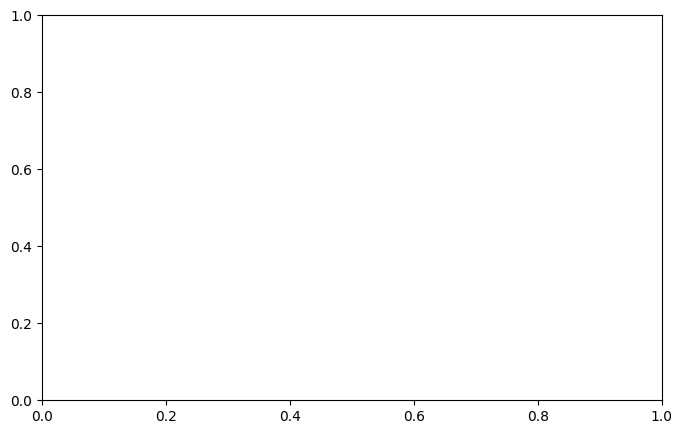

In [4]:
UE_idx   = [ij[0] for ij in UEs] #[1,2,3,4,5,6,8,17,18]
UE_names = [ij[1].strip("()?") for ij in UEs] #['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            #'Individuel ou collectif?','Calculateur?','Influence recherche?'].replace('(','').replace(')','')

print(UE_idx,UE_names)
#colors2 = ['red', 'blue']
#a       = np.random.random(4)
#cs      = cm.Set1(np.arange(4)/4.)

keys1 = ['Oui','Non']
keys2 = ['Tout à fait d\'accord','Plutôt d\'accord','Plutôt pas d\'accord','Pas du tout d\'accord']

# Changing key for specific question
Idx_change = [9]
tabword = ['cohérence','lien entre']
keys3 = ['Bonne','Plutôt bonne','Plutôt mauvaise','Mauvaise']

# Changing answers for specific question
UE_change  = ['LU2ST034','LU2ST303','LU2ST352','LU2ST044','LU2ST402','LU3ST603','LU3ST602']
keys4 = ['Très clair','Assez clair','Assez flou','Très flou']

# Changing answers for S1
tabword2 = ['capsules']
keys5 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']
tabword3 = ['Ces vidéos']
keys6 = ['Oui, le plus souvent','Oui, certaines',\
         'Non, même si je les ai visionnées','Non, car pas visionnées']

# Changing answers for S6
tabword4 = ['Vous sentez-vous','lien existant entre disciplines']
keys7 = ['Oui','Pas d\'avis','Non']

tabword5 = ['davantage de TP']
keys8 = ['Davantage de TD et exercices “sur papier” encadrés',\
         'Je ne changerais rien',\
         'Davantage de TP en salle informatique',\
        ]

# Changing answers for S5 (OIP)
tabword6 = ['avenir professionnel']
keys9 = ['Utile','Pas d\'avis particulier', 'Pas utile']

# Changing answers for S6 (Eaux ressources risques, ODD)
# Avec ces cours, quelles étaient vos connaissances sur les Objectifs de Développement Durable et l’Agenda 2030?
tabword7= ['2030']
keys10= ['Nulles','Je connaissais le terme mais pas le contenu',\
         'Superficielles, seulement des généralités',\
         'Assez bonnes (Notions approfondies de certains ODD)']

#keys6 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
#'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
#'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']

print(tabword)
#c1 = '#1f77b4' #blue
#c2 = 'red' #green
#colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
#colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

# 12 questions !
Nb_questions = 10 #(UE_idx[1]-UE_idx[0])-1
if Semestre == 1:
    Nb_questions = 19
if Semestre == 6:
    Nb_questions = 14
print(Nb_questions)

figsize = (8, 5)

#UE_idx=[UE_idx[ij] for ij in range(len(UE_idx)) if UE_names[ij]=='LU2ST045']
#print(UE_idx)

for ij,idx in enumerate(UE_idx):
    UE = UE_names[ij]
    print('UE : ',UE)
    
    path_file = pathfig+UE+'/'
    print(path_file)
    _mkdir(path_file)
    
    for ik in range(Nb_questions):
      fig, ax = plt.subplots(1,figsize=figsize)

      data = df[questions[idx+ik]]
       
      #data = data.replace('’','\'')
      data = data.replace('Tout à fait d’accord','Tout à fait d\'accord')
      data = data.replace('Plutôt pas d’accord','Plutôt pas d\'accord')
      #data = data.replace('d’accord','d\'accord')
      data = data.replace('è','\'e')
      #data = data.replace('Très','Tr\'es')
      #print(ik,data)
      data = data.value_counts() #normalize=True) 
                
      #colors = colors2 ; 
      changecolor = 0
      keys = keys1
      if ('Oui' in data.keys()):
        keys = keys1
      else:
        keys = keys2
        #if ik in Idx_change:
        if any([ii in questions[idx+ik] for ii in tabword]):
        #if 'cohérence' in questions[idx+ik]:
            keys = keys3
            if UE in UE_change:
                keys = keys4
        elif any([ii in questions[idx+ik] for ii in tabword2]):
            keys = keys5
        elif any([ii in questions[idx+ik] for ii in tabword3]):
            keys = keys6
      if any([ii in questions[idx+ik] for ii in tabword4]):
            keys = keys7
      if any([ii in questions[idx+ik] for ii in tabword5]):
            keys = keys8
      if any([ii in questions[idx+ik] for ii in tabword6]):
            keys = keys9
      if any([ii in questions[idx+ik] for ii in tabword7]):
            keys = keys10
      print(UE,idx,keys,data.index)
    
      cmap = plt.cm.bwr
      colors = cmap(np.linspace(0., 0.95, len(keys)))
      #if changecolor:
      #    colors = colors_save 
  
          
    
      gcolors=dict()
      for ij,key in enumerate(keys):
        gcolors[key]=colors[ij]
      labels = [ij for ij in gcolors if ij in data.index]
      data   = data.reindex(labels)
      #print(labels)
        
      wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
                                            ,colors=[gcolors[i] for i in data.index]\
                                            ,textprops=dict(color="w") #, colors=color
                                            ,startangle=0)
    
      ax.legend(wedges, data.index,loc="best",bbox_to_anchor=(1, 1, 0.5, -0.5))
      plt.setp(autotexts, size=10, weight="bold")
    
      title = questions[idx+ik].split('.')[0]
      ax.set_title(title)
      #print(title)
    
      name_file = 'Question_'+str(ik)
      name_file = path_file + name_file
      print(name_file)
      _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


